Base Libraries:

These are the ones that will be used for ALL model builds... such as classification reports for
model evaluation and the sklearn base library, or pandas for reading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn as sks
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('heart_data_model_building.csv')

In [3]:
X = df.drop('cardio',axis = 1)
y = df[['cardio']]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = .20,
                                                   random_state = 42)

The above cells are separating the dataset for model building. Since these are the same variables that are used in all of the models, there is no need to recreate them for each model. If something needs to be tuned... such as test size, we can easily alter it above to see how it changes for all models.

## Preliminary Models --- Logistic Regression & KNN

### Logistic Regression --- Baseline Model

In [5]:
from sklearn.linear_model import LogisticRegression

In [6]:
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X_train.values,y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [7]:
log_y_pred = classifier.predict(X_test.values)

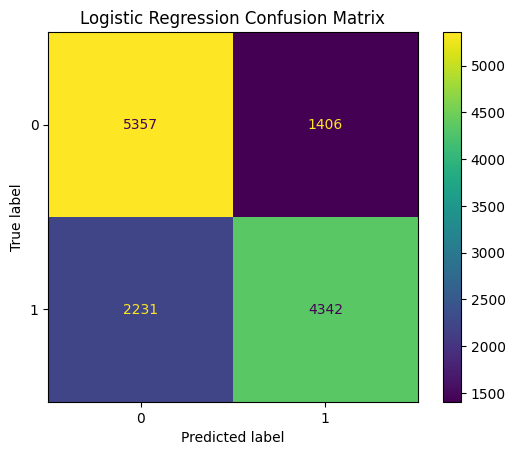

In [8]:
cm = confusion_matrix(y_test, log_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [9]:
print(classification_report(y_test,log_y_pred))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75      6763
           1       0.76      0.66      0.70      6573

    accuracy                           0.73     13336
   macro avg       0.73      0.73      0.73     13336
weighted avg       0.73      0.73      0.73     13336



### K-Nearest Neighbors

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
k = 257
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train.values.ravel())
knn_y_pred = knn.predict(X_test)

In [12]:
print(classification_report(y_test,knn_y_pred))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74      6763
           1       0.75      0.65      0.70      6573

    accuracy                           0.72     13336
   macro avg       0.73      0.72      0.72     13336
weighted avg       0.72      0.72      0.72     13336



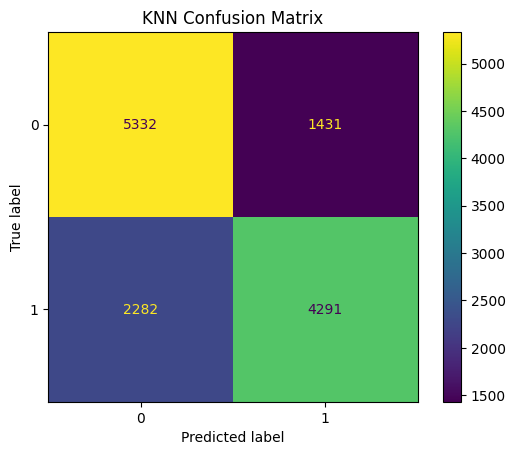

In [13]:
cm = confusion_matrix(y_test, knn_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('KNN Confusion Matrix')
plt.show()

** The high amount of neighbors, 257, was used according to a rule to use the square root of the size of the dataset

### KNN Takeaways 

The accuracy of this first model was 72%, not the greatest. The model does not seem to be the worst fit, but we can probably do better, likely by using a different type of model

The F1 score shows that the model is slightly better for the 0 class balance between precision and recall (absence of cvd), and for the 1 class, the model is less precise at doing so. 

Given the situation of medical diagnostics, the recall for the 1 class is concerning because it suggests that 34% of predictions will result in a false negative. The amount of false negatives in a medical model is important to look at because you want to catch the disease before it is too late for the patient.

## Decision Tree and Random Forest without Tuning

### Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [16]:
dtc_y_pred = dtc.predict(X_test)

In [17]:
print(classification_report(y_test,dtc_y_pred))

              precision    recall  f1-score   support

           0       0.64      0.65      0.65      6763
           1       0.64      0.62      0.63      6573

    accuracy                           0.64     13336
   macro avg       0.64      0.64      0.64     13336
weighted avg       0.64      0.64      0.64     13336



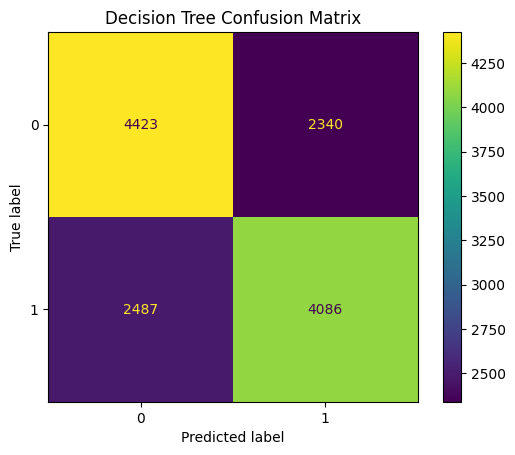

In [18]:
cm = confusion_matrix(y_test, dtc_y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Decision Tree Confusion Matrix')
plt.show()

The decision tree without any parameter tuning performed the worst of any model. With an accuracy score of 64%, it wasn't too far from the benchmarks that were set by the logistic regression and knn models, but no improvement was shown in any areas of the model.

### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train.values.ravel())
rf_y_pred = rf_model.predict(X_test)

In [21]:
print(classification_report(y_test,rf_y_pred))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      6763
           1       0.71      0.69      0.70      6573

    accuracy                           0.71     13336
   macro avg       0.71      0.71      0.71     13336
weighted avg       0.71      0.71      0.71     13336



The random forest model performed better than the decision tree model, but made no substantial improvement when being compared to the KNN model. It had an accuracy of 71% with a slightly decreased false negative rate of 31%. More tuning will be made to see if any improvements can be made.

## Decision Tree and Random Forest Models with Tuning

In the below models, the test splitting was reproduced in each cell as more changes will be made in comparsion to the base models that were previously created.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = .20,
                                                   random_state = 42)
dtc = DecisionTreeClassifier(max_depth=8,
                             class_weight={0: 1, 1: 10},
                             max_leaf_nodes=50)
dtc.fit(X_train, y_train.values.ravel())
y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.05      0.09      6763
           1       0.50      1.00      0.67      6573

    accuracy                           0.51     13336
   macro avg       0.71      0.52      0.38     13336
weighted avg       0.72      0.51      0.37     13336



Trial and error was used to alter the max_depth and max_leaf_nodes, attempting to see how changes would impact accuracy and recall for the 1 class was the goal. 

The decision tree was altered to give the presence of cardiovascular disease 10x the weight of the absence of it. The reason for this is the medical context of the model. Accuracy was sacrificed as a result of this choice. The model does extremely poor at identifying individuals with no cardiovascular disease. 

This resulted in the shift for model performance being better overall for predicting the 1 class (cvd present)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = .25,
                                                   random_state = 42)

rfc = RandomForestClassifier(max_depth=8,
                             class_weight={0:1,1:10})
rfc.fit(X_train, y_train.values.ravel())
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.02      0.04      8453
           1       0.50      1.00      0.66      8216

    accuracy                           0.50     16669
   macro avg       0.72      0.51      0.35     16669
weighted avg       0.72      0.50      0.35     16669



Using 1:10, class_weight ratio of the absent vs. present cvd, the Random Forest model was able to produce similar results to the decision tree. 

The overall model is still poor, but instances of false negatives were also not a problem with the model... also coming at the sacrifice of the 0 class predicitions.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = .3,
                                                   random_state = 42)

rfc = RandomForestClassifier(max_depth=8,
                             class_weight={0:1,1:2})
rfc.fit(X_train, y_train.values.ravel())
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.55      0.65     10141
           1       0.65      0.84      0.73      9862

    accuracy                           0.69     20003
   macro avg       0.71      0.70      0.69     20003
weighted avg       0.72      0.69      0.69     20003



More changes were made to the random forest model to see if overall accuracy could be improved while reducing the false negatives that were a result of the model.

The highest accuracy that could be achieved without decreasing the recall for the 1 class by too much was 70%, with a 16% false negative rate.